In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import tree

In [7]:
####################################################################################################
# • Tentar classificar atividade humana por acelerômetro e giroscópio de celular
# https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones
####################################################################################################

from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

def download_and_unzip(url, extract_to='.'):
    http_response = urlopen(url)
    zipfile = ZipFile(BytesIO(http_response.read()))
    zipfile.extractall(path=extract_to)
    
download_and_unzip('https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip', '../datasets_uci')

KeyboardInterrupt: 

In [ ]:
df_cols = pd.read_csv('../datasets_uci/UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)
usecols = df_cols.iloc[:, 1]

X_train = pd.read_csv('../datasets_uci/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = usecols

y_train = pd.read_csv('../datasets_uci/UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)
y_train.columns = ['activity']

X_test = pd.read_csv('../datasets_uci/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = usecols

y_test = pd.read_csv('../datasets_uci/UCI HAR Dataset/test/y_test.txt', delim_whitespace=True, header=None)
y_test.columns = ['activity']

In [ ]:
#df_mobile
#usecols.shape
#df_mobile = pd.read_csv('../datasets_uci/UCI HAR Dataset/train/X_train.txt')
#df_mobile.head()
#df_mobile = pd.read_csv('../datasets_uci/UCI HAR Dataset/train/X_train.txt', sep=r'\\t', usecols = usecols, header=None,engine='python')
#df_mobile

In [ ]:
df_hungary = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"
,names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])

In [ ]:
df_hungary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    object 
 4   chol      294 non-null    object 
 5   fbs       294 non-null    object 
 6   restecg   294 non-null    object 
 7   thalach   294 non-null    object 
 8   exang     294 non-null    object 
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    object 
 11  ca        294 non-null    object 
 12  thal      294 non-null    object 
 13  num       294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [ ]:

y = df_hungary['num'].ravel()
X = df_hungary[['sex']]
regr = DecisionTreeRegressor(max_depth=2)
regr.fit(X, y)


DecisionTreeRegressor(max_depth=2)

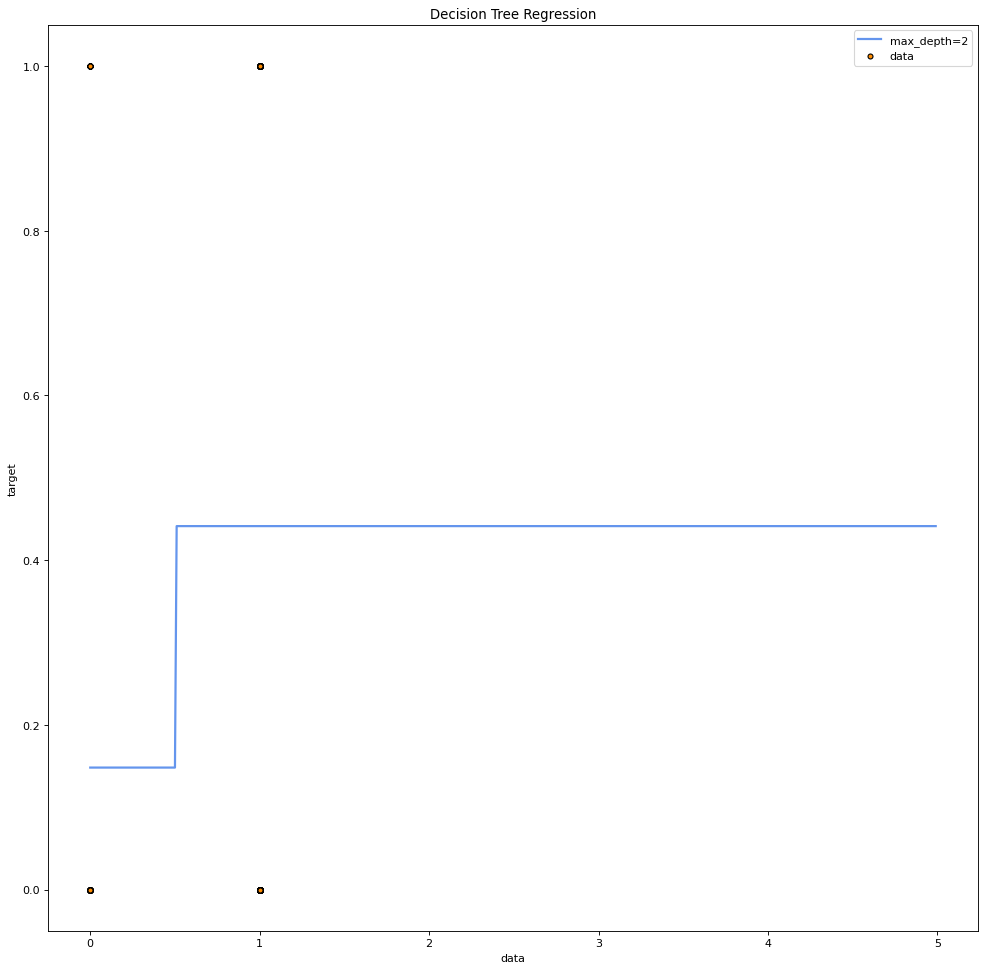

In [ ]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr.predict(X_test)

# Plot the results
plt.figure(figsize=(15, 15), dpi=80)
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()